In [1]:
from bp_funcs import *

/home/sijingdu/anaconda3/envs/tnmpa/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [54]:
mu = 0.0
T = 3.0
L = 10.0

N_a_ls = [14, 16, 18, 20, 22, 24, 30, 40, 50, 60]

bp_density_ls = []

In [55]:
for N_a in N_a_ls:
    _,_,density,_,_,_ = bp_2DLJ_model(T=T, L=L, N_a=N_a, chemical_potential=mu)
    bp_density_ls.append(density)

Successfully built the HTN.


max_dm=8.065960212855217e-06:  12%|█▏        | 185/1500 [00:00<00:02, 587.27it/s]


Successfully built the HTN.


max_dm=9.448648715548735e-06:   3%|▎         | 41/1500 [00:00<00:04, 342.37it/s]


Successfully built the HTN.


max_dm=9.956564496926834e-06:   4%|▍         | 59/1500 [00:00<00:06, 217.51it/s]


Successfully built the HTN.


max_dm=8.18909288141656e-06:   5%|▍         | 74/1500 [00:00<00:09, 154.89it/s]  


Successfully built the HTN.


max_dm=8.853489945365167e-06:   3%|▎         | 50/1500 [00:00<00:14, 102.30it/s]


Successfully built the HTN.


max_dm=7.85044814646807e-06:   3%|▎         | 46/1500 [00:00<00:19, 75.79it/s]  


Successfully built the HTN.


max_dm=9.812030676376038e-06:   4%|▎         | 53/1500 [00:01<00:52, 27.60it/s] 


Successfully built the HTN.


max_dm=8.859644263031763e-06:   3%|▎         | 47/1500 [00:05<03:01,  8.01it/s] 


Successfully built the HTN.


max_dm=7.995138054842088e-06:   3%|▎         | 46/1500 [00:15<07:59,  3.03it/s] 


Successfully built the HTN.


max_dm=9.002695480195277e-06:   3%|▎         | 45/1500 [00:34<18:26,  1.31it/s] 


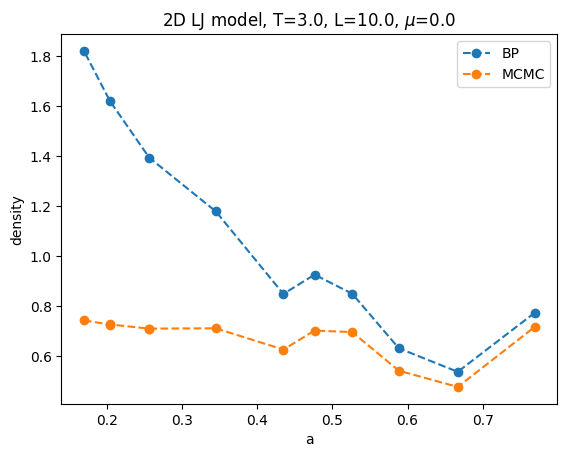

In [56]:
file = f'../MC/Results/2DLJ_occ_L=10_results_pbc.txt'
with open(file, 'r') as f:
    lines = f.readlines()

mc_a_ls = []
mc_density_ls = []
import re
for line in lines:
    if re.search(f'T={T}', line):
        # print(line)
        mu_pattern = re.compile(r'chemical potential = (-?\d+(\.\d+)?)')
        mu0 = float(mu_pattern.search(line).group()[21:])
        if mu0 != mu:
            continue
        idx = lines.index(line)
        N_a_pattern = re.compile(r'N_a=\d+')
        prev_line = lines[idx-1]
        N_a = int(N_a_pattern.search(prev_line).group()[4:])
        mc_a_ls.append(L*(N_a-1)**-1)
        density_pattern = re.compile(r'Density = \d+\.\d+')
        # print(line)
        density = float(density_pattern.search(line).group()[10:])
        mc_density_ls.append(density)

# Sort the lists
mc_a_ls, mc_density_ls = zip(*sorted(zip(mc_a_ls, mc_density_ls)))

# Plot
import matplotlib.pyplot as plt
a_list = [L*(N_a-1)**-1 for N_a in N_a_ls]

plt.plot(a_list, bp_density_ls, '--o', label='BP')

plt.plot(mc_a_ls, mc_density_ls, '--o', label='MCMC')
plt.xlabel('a')
plt.ylabel('density')
plt.legend()
plt.title(f'2D LJ model, T={T}, L={L}, $\mu$={mu}')
plt.show()

